# Introduction to AI: assignment 2 - Regression

In this assignment you are going to apply linear regression methods to analyze a genomic dataset<sup>1</sup>: *genome_sizes.csv*.

### Motivation
The genome of an organism encodes all the information for producing proteins, which in turn are the actors of all cellular functions. The number of different coded proteins varies widely between species, and is a measure of the complexity of the chemical pathways of an organism. Moreover, not all genetic material gets translated into proteins: *coding* and *non-coding* parts are present, and their extension and number widely changes between different organisms.
**Is there a relationship between genome length, number of coded proteins, and extension of coding/noncoding parts?**

### Aim
We will base our enquiry on the data provided by Hou & Lin in a study on genome sizes of a large variety of species<sup>1</sup>. We will first read, clean and visualize the dataset (part A), then we will analyze it by applying linear regression methods of increasing complexity (parts B, C, D).

<sup>1</sup>The data is extracted from: *Hou Y, Lin S. Distinct gene number-genome size relationships for eukaryotes and non-eukaryotes: gene content estimation for dinoflagellate genomes. PLoS One. 2009;4(9):e6978*
[doi:10.1371/journal.pone.0006978](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0006978)

## A. Reading and visualizing the Hou-Lin data set

**Always have a look at the data first!**

Open the genome_sizes.csv file with a text editor (or print it on a terminal with your favorite command: cat, less, more, head,...). 
1. How is the file formatted?
2. Are there missing data?
3. Are there header lines?

In [1]:
#

To read the csv file genome_sizes.csv, you can use a library called [**pandas**](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html). 

* Import the pandas library here, and use the function [*read_csv*](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) to read the dataset into a DataFrame.

* Read the documentation in order to import this file correctly: remember for example to consider the function arguments for parsing header lines.

* Give these names to the columns in the file:
    1. "ScientificName"
    2. "Domain"
    3. "GenomeLength"
    4. "ProteinCodingGenes"<sup>2</sup>
    5. "Genes"
    
<sup>2</sup>Genes usually code for proteins, but can also code for types of RNA that do not get translated into polypeptides. For example, *ribosomal* and *transfer RNA* (rRNA and tRNA) genes code for special RNA machineries that do not have any corresponding protein.

In [2]:
import pandas as pd
# Use pd.read_csv here

Show what is inside the data frame

How many different values does the "Domain" column take? Enumerate them using a DataFrame method

As you might have noticed, some lines contain NaN (Not a Number) values, which means that the table was not complete. Keeping NaN values in your table can soon generate issues: it is thus recommended to remove them, when this does not compromise the integrity of the dataset.

Look for all lines containing NaN. How many do you find? How many lines does the file contain? Will the dataset be compromised if you eliminate all NaN-containing lines?
If not, drop all the lines containing NaN values

In [3]:
# Enumerate NaN values in each column. Are they few enough not to change statistical significance of the dataset?

# If so, delete the lines with NaN values


We consider the number of protein coding genes as the output and the genome size and percentage of coding genome as features. Import numpy, generate feature matrix $\mathbf{X}$ and generate output array $\mathbf{y}$ 

In [4]:
import numpy as np

# Feature matrix X

# Output array y

Print first row to check

Scatter plots for $\mathbf{y}$ against each considered feature.
Given the diversity of the organisms, quantities might need to be plotted in logarithmic scale!

Protein coding genes vs. genome length

In [17]:
import matplotlib.pyplot as plt # This is the graphic library of Python
# Command to make figures appear in Jupyter
%matplotlib inline 


## plt.scatter(...) # Produces a scatter plot. It needs two arguments (Xs and Ys)
## plt.title("Scatter plot of protein coding genes vs. genome length") # Set the title
## plt.xlabel("Genome length") # Label the x axis
## plt.ylabel("PCG") # Label the y axis

Protein coding genes vs. percentage of coding genome

In [6]:
# Same...

Now plot the two scatter plots at once in a single figure with the command **plt.subplots()**. You will have to specify that the Y axis is the same for the two plots.

In [18]:
# There are two ways of using matplotlib: by calling functions (ex: plt.function())
#  or by defining figure and axis objects and using their methods (ex: ax.set_function())
#  Here, you will have to use the second way, which gives you more options

## fig, axs = plt.subplots() 
## axs[0].scatter(...)
## axs[1].scatter(...)
## etc...

Are both the two features correlated to the output? What could be the cause?

Make the same two graphs, but this time color values belonging to each domain differently (one color for Eukaryotes, one for Bacteria, etc.). What do you notice?

## B. Simple linear regression

To start, we will work only with data from **Eukaryotes** only. Extract the Eukaryotes data from the DataFrame and define the usual feature matrix and output vector.
Import linear regression functions from Scikit-learn.

In [8]:
from sklearn import linear_model as lm
from sklearn import metrics as met

# Define X and y again

Make a linear regression for the Genome length feature. Be careful: what are the variables that linearly correlate?

In [20]:
# Transform X and y so that they linearly correlate

# Define the linear regressor object

## linreg_1 = lm.LinearRegression()

# Train the linear regressor

## linreg_1.fit(...)

# Calculate the MSE, RMSE, R^2

## MSE_1 = met.mean_squared_error(...)
## RMSE_1 = np.sqrt(...)
## R_2_1 =  met.r2_score(...)

# Print the quantities you calculated

## print('beta_0 = {}, beta_1 = {}'.format(linreg_1.intercept_[0],
##                                         linreg_1.coef_[0,0]))
## print('MSE = ',MSE_1)
## print('RMSE = ',RMSE_1)
## print('R^2 = ',R_2_1)

# Use the regressor to predict the regression segment. 
#  What are the x-extrema of the segment?

# Scatter plot the data and the prediction line


Make a linear regression for the Coding genome percentage feature.

In [21]:
# Same...

## C. Multiple linear regression with 2 explanatory variables

Linear regression for both features

In [22]:
# Generalize what you did in B to account for 2 input dimensions

Plot predicted surface and data points for genome length and percentage of coding genome

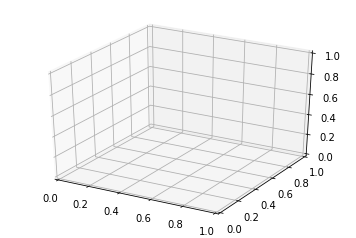

In [23]:
from mpl_toolkits.mplot3d import Axes3D    # For plotting 3D graphs
fig = plt.figure()
ax = fig.gca(projection='3d')

# This time you will have to predict a plane, not a line. A plane embedded in a 3D space 
#  has 2 input dimensions and 1 output dimension...

# Plot the predicted plane
# ax.plot_surface(x1, x2, y, alpha = 0.2)    # alpha is the color channel for transparency
# etc...

## D. Multiple linear regression with interaction

Let's work with a more difficult part of the dataset: **Mitochondrial DNA**.
Try to apply the simple regression model of part B to the two features. What do you notice?

In [24]:
# Define X and y for Mitochondrial records (don't forget the usual transformations)

# Plot the two features side by side


Is there a better explanatory feature than the two we have worked with so far? Provided the genes are all about of the same length, the length of the genome multiplied by the percentage of coding genome should give us a better estimate of how many coding genes there are. We will thus try to use an interaction term that relates the two variables.

Define again the matrix and the vector, and add to the matrix a new column given by the product of the two features. Linear regression for genome length and percentage of coding genome spendings with additional interaction term. Plot this new interaction feature against the output and make a simple regression model. Is it any better?

In [25]:
# Define an interaction feature and plot it against the PCG

Obtain linear regression coefficients and evaluate model adequacy indicators

In [26]:
# Train a linear regressor on the data you plotted, 
#  and plot the usual statistics and the resulting graph


Do a residual/leverage analysis to check if there are outliers and outliers with high leverage. To obtain the leverage scores you will need to evaluate a matrix inverse and to retrieve the diagonal elements of a matrix, these operations can be done with the numpy commands linalg.inv and diag respectively.

In [27]:
# Calculate h

# Calculate the residuals

# Scatter plot h against the residuals


Make a multivariate analysis like you did in Section C, but this time add to the feacture matrix a column containing the interaction term you calculated in this section. How does the fit look?

Confirm your analysis by repeating the residual/leverage analysis for the multivariate+interaction case